In [36]:
from keras.datasets import mnist
import numpy as np
(x_train, y_train),(x_test , y_test) = mnist.load_data()

print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(60000, 28, 28)
(10000, 28, 28)
(60000,)
(10000,)


Reshaping `x_train` and `x_test` tensors into order 4 because that's how Keras accepts it.  
Also, the last dimension is the depth/channels; for colored images, it would be 3, else for greyscale its 1.

## **Reshape**

Pixel Values in Images:

In grayscale images, pixel values typically range from 0 to 255, where:
0 represents black.
255 represents white.
Values in between represent varying shades of gray.

Normalization:

Dividing by 255.0 scales the pixel values to a range between 0.0 and 1.0.

In [37]:
x_train_vec = x_train.reshape((60000, 28, 28, 1))/255.0
x_test_vec = x_test.reshape((10000, 28, 28, 1))/255.0

print(x_train_vec.shape)
print(x_test_vec.shape)

(60000, 28, 28, 1)
(10000, 28, 28, 1)


## **one hot encoding**

In [38]:
def one_hot_enc(labels,dimension=10):
    results = np.zeros((len(labels),dimension))
    for i,label in enumerate(labels):
        results[i,label] = 1
    return results

y_test_vec = one_hot_enc(y_test)
y_train_vec = one_hot_enc(y_train)

print(y_test_vec.shape)
print(y_train_vec.shape)

(10000, 10)
(60000, 10)


Randomise and split data

In [39]:
rand_indices = np.random.permutation(60000)
train_ind = rand_indices[:50000]
valid_ind = rand_indices[50000:]

x_train = x_train_vec[train_ind]
y_train = y_train_vec[train_ind]

x_valid = x_train_vec[valid_ind]
y_valid = y_train_vec[valid_ind]

print("x_train shape:", x_train.shape)
print("y_train shape:", y_train.shape)
print("x_valid shape:", x_valid.shape)
print("y_valid shape:", y_valid.shape)

x_train shape: (50000, 28, 28, 1)
y_train shape: (50000, 10)
x_valid shape: (10000, 28, 28, 1)
y_valid shape: (10000, 10)


# **Building the CNN**

In [40]:
from keras import models
from keras import layers

In [41]:
model = models.Sequential()
model.add(layers.Conv2D(10,(5,5),activation='relu',input_shape=(28,28,1)))
model.add(layers.MaxPool2D((2,2)))
model.add(layers.Conv2D(20,(5,5),activation='relu'))
model.add(layers.MaxPool2D((2,2)))

#The Flatten layer is used to convert the multi-dimensional output of the 
#convolutional and pooling layers into a 1-dimensional vector. 
#This is necessary because the fully connected (dense) layers in a neural network expect a 1D input
model.add(layers.Flatten())
model.add(layers.Dense(100,activation='relu'))
model.add(layers.Dense(10,activation='softmax'))

c:\Users\abdul\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [42]:
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)               │ (None, 24, 24, 10)     │           260 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 12, 12, 10)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 8, 8, 20)       │         5,020 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 4, 4, 20)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 320)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 100)            │        32,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 38,390 (149.96 KB)

 Trainable params: 38,390 (149.96 KB)

 Non-trainable params: 0 (0.00 B)

## Compile the model

optimization algorithm, learning rate(LR), loss function, and metric.

In [43]:
from keras import optimizers
model.compile(
    optimizers.RMSprop(learning_rate=0.0001),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

## train model 
specify epoch and batch size 

In [44]:
history = model.fit(x_train,y_train, epochs=50, batch_size=128, validation_data=(x_valid,y_valid))

Epoch 1/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 6s 11ms/step - accuracy: 0.5332 - loss: 1.7385 - val_accuracy: 0.8636 - val_loss: 0.4854
Epoch 2/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.8861 - loss: 0.4014 - val_accuracy: 0.9077 - val_loss: 0.3082
Epoch 3/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.9202 - loss: 0.2754 - val_accuracy: 0.9309 - val_loss: 0.2379
Epoch 4/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.9364 - loss: 0.2200 - val_accuracy: 0.9426 - val_loss: 0.1985
Epoch 5/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.9468 - loss: 0.1812 - val_accuracy: 0.9507 - val_loss: 0.1712
Epoch 6/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.9549 - loss: 0.1506 - val_accuracy: 0.9585 - val_loss: 0.1456
Epoch 7/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.9619 - loss: 0.1286 - val_accuracy: 0.9608 - val_loss: 0.1321
Epoch 8/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.9671 - loss: 0.1166 - val_accuracy:

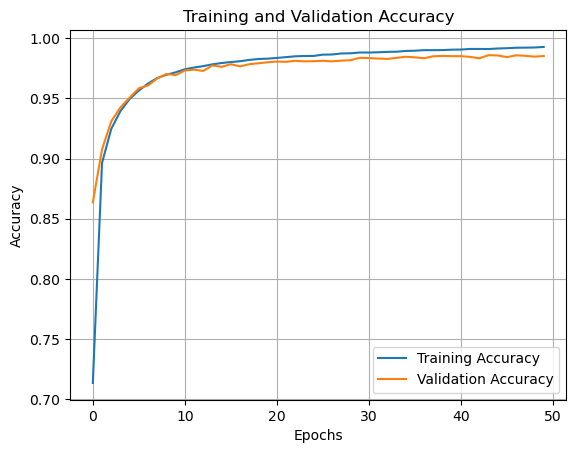

In [51]:
import matplotlib.pyplot as plt
%matplotlib inline

epochs = range(50)
train_acc = history.history['accuracy']
valid_acc = history.history['val_accuracy']

plt.plot(epochs, train_acc, label='Training Accuracy')
plt.plot(epochs, valid_acc, label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

## Evaluate

In [58]:
loss_and_acc = model.evaluate(x_test_vec, y_test_vec)
print("loss")
print(loss_and_acc[0])
print("\n accuracy")
loss_and_acc[1]

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9835 - loss: 0.0524
loss
0.04144805297255516

 accuracy


0.9871000051498413